In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
from statsmodels.tsa.seasonal import seasonal_decompose

from textblob import TextBlob


In [30]:
file_path = "../data/raw_analyst_ratings.csv"
df = pd.read_csv(file_path, parse_dates=['date'])

df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


(None,
    Unnamed: 0                                           headline  \
 0           0            Stocks That Hit 52-Week Highs On Friday   
 1           1         Stocks That Hit 52-Week Highs On Wednesday   
 2           2                      71 Biggest Movers From Friday   
 3           3       46 Stocks Moving In Friday's Mid-Day Session   
 4           4  B of A Securities Maintains Neutral on Agilent...   
 
                                                  url          publisher  \
 0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
 1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
 2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
 3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
 4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   
 
                         date stock  
 0  2020-06-05 10:30:54-04:00     A  
 1  2020-06-03 10:45:20-04:00     A  
 2  2

In [4]:
df['headline']

0                    Stocks That Hit 52-Week Highs On Friday
1                 Stocks That Hit 52-Week Highs On Wednesday
2                              71 Biggest Movers From Friday
3               46 Stocks Moving In Friday's Mid-Day Session
4          B of A Securities Maintains Neutral on Agilent...
                                 ...                        
1407323               Top Narrow Based Indexes For August 29
1407324    Recap: Wednesday's Top Percentage Gainers and ...
1407325    UPDATE: Oppenheimer Color on China Zenix Auto ...
1407326    Oppenheimer Initiates China Zenix At Outperfor...
1407327    China Zenix Auto International Opens For Tradi...
Name: headline, Length: 1407328, dtype: object

#### Calculating headline lengths and ploting distribution of headline lengths

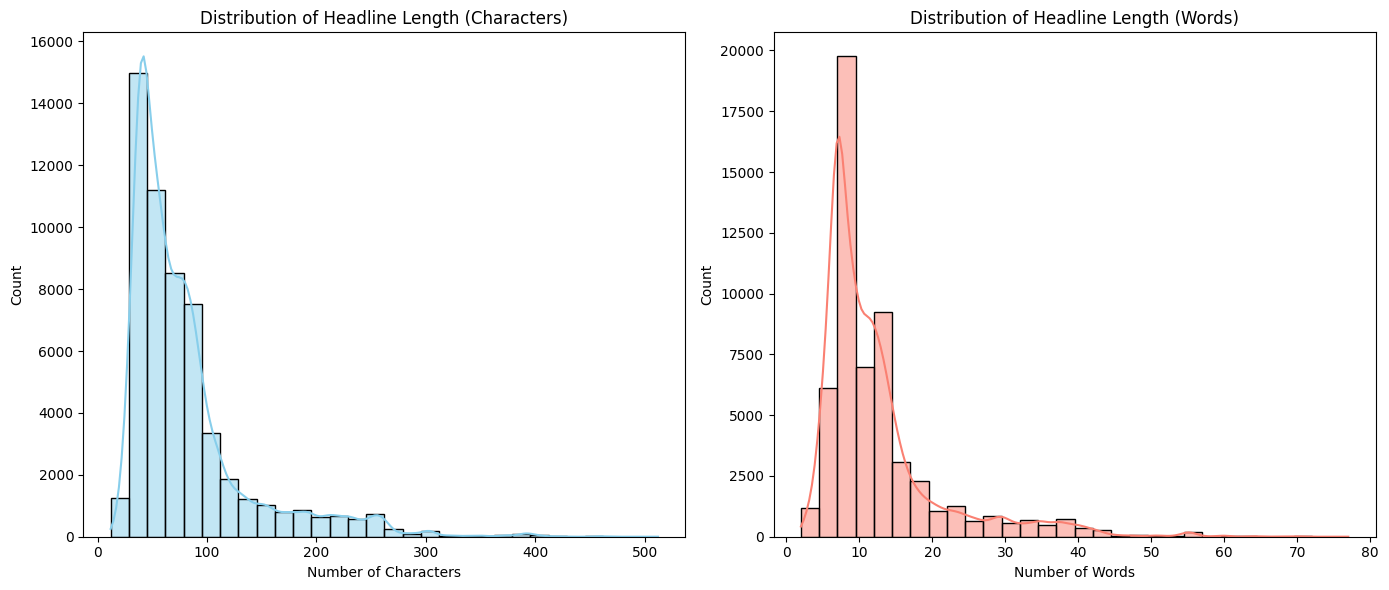

In [13]:
df['headline_length'] = df['headline'].str.len()
df['word_count'] = df['headline'].str.split().apply(len)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['headline_length'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Headline Length (Characters)")
plt.xlabel("Number of Characters")
plt.subplot(1, 2, 2)
sns.histplot(df['word_count'], bins=30, kde=True, color='salmon')
plt.title("Distribution of Headline Length (Words)")
plt.xlabel("Number of Words")

plt.tight_layout()
plt.show()

##### Counting the number of articles per publisher to identify which publishers are most active.


In [9]:
publisher_counts = df['publisher'].value_counts().reset_index()
publisher_counts.columns = ['publisher', 'article_count']
publisher_counts.head(10)

,publisher,article_count
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
5,Eddie Staley,57254
6,Hal Lindon,49047
7,ETF Professor,28489
8,Juan Lopez,28438
9,Benzinga Staff,28114


#### Analyzing the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.

-309.8797682662618 261.8311906378478


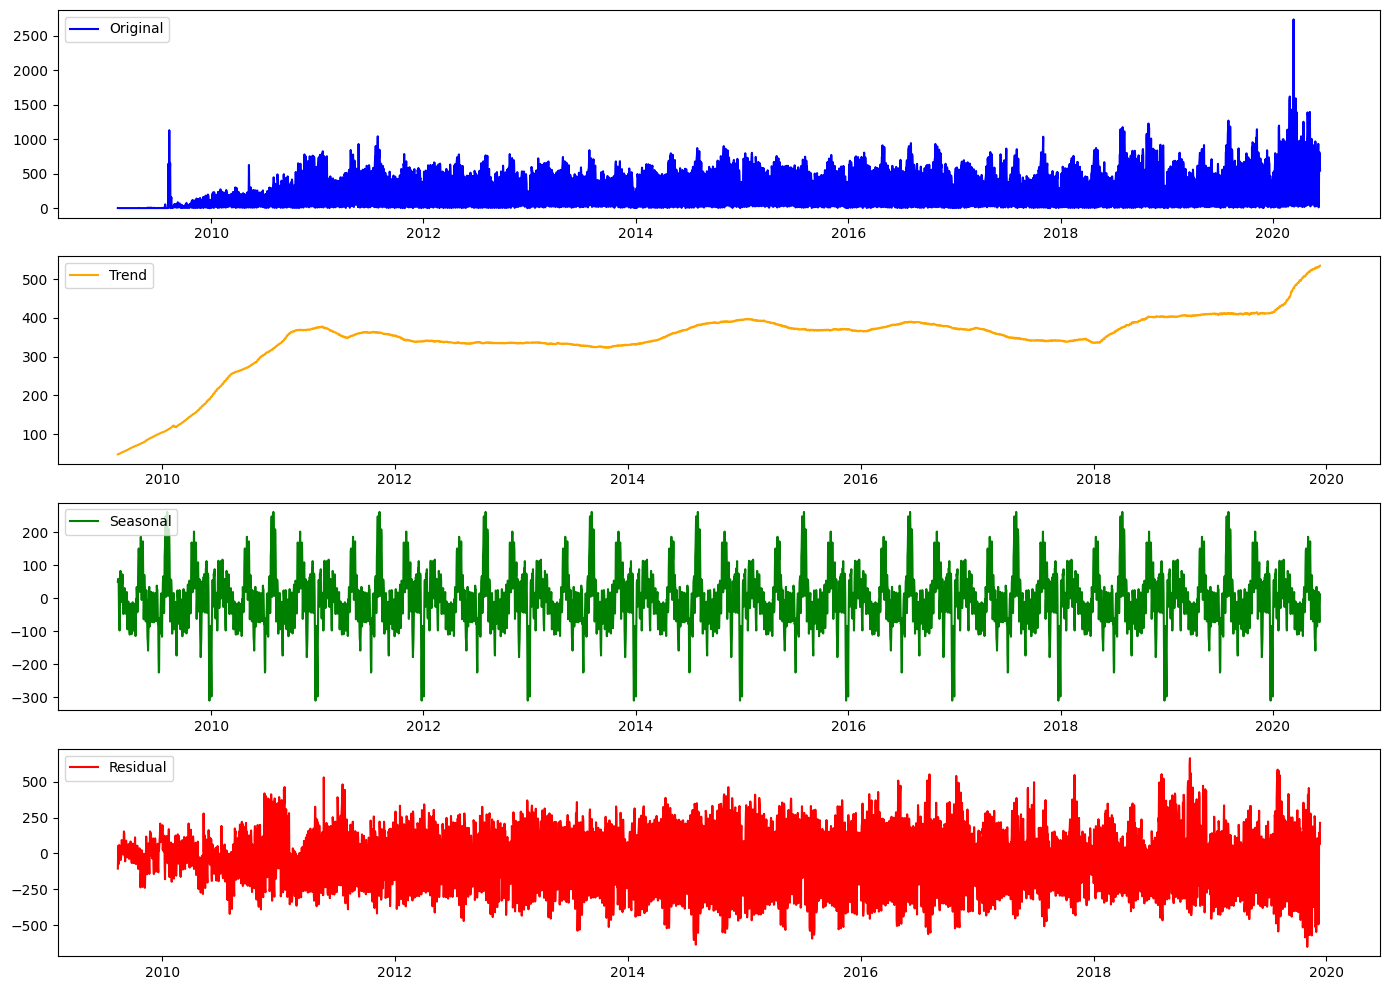

In [47]:


df['date'] = pd.to_datetime(df['date'], format='ISO8601').dt.date

# Group by date and count
daily_headline = df.groupby('date').size()

# Convert to DataFrame
time_series_data = pd.DataFrame({
    'date': daily_headline.index,
    'Headlines_Count': daily_headline.values
})

# Convert to datetime and set index
time_series_data['date'] = pd.to_datetime(time_series_data['date'])
time_series_data.set_index('date', inplace=True)

# Resample to daily frequency
time_series_data = time_series_data.asfreq('D')
time_series_data.fillna(0, inplace=True)

# Decompose
decomposition = seasonal_decompose(time_series_data['Headlines_Count'], model='additive', period=365)
print(decomposition.seasonal.min(), decomposition.seasonal.max())

# Plot components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(time_series_data['Headlines_Count'], label='Original', color='blue')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [1]:
!python ../run_news_correlation.py


Traceback (most recent call last):
  File "/home/bethel/Documents/10academy/financial-news-analysis/notebooks/../run_news_correlation.py", line 16, in <module>
    news_df = pd.read_csv("data/raw_analyst_ratings.csv")
  File "/home/bethel/Documents/10academy/financial-news-analysis/.venv/lib/python3.10/site-packages/pandas/io/parsers/readers.py", line 1026, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/home/bethel/Documents/10academy/financial-news-analysis/.venv/lib/python3.10/site-packages/pandas/io/parsers/readers.py", line 620, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/home/bethel/Documents/10academy/financial-news-analysis/.venv/lib/python3.10/site-packages/pandas/io/parsers/readers.py", line 1620, in __init__
    self._engine = self._make_engine(f, self.engine)
  File "/home/bethel/Documents/10academy/financial-news-analysis/.venv/lib/python3.10/site-packages/pandas/io/parsers/readers.py", line 1880, in _make_engine
    self.handl